In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import keras.initializers 
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [75]:
# If GPU is not available: 
# GPU_USE = '/cpu:0'
# config = tf.ConfigProto(device_count = {"GPU": 0})


# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [76]:
FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
NewFVlen = 100
Class = 8
#RunFolder = "Default"
RunFolder = "28Jan2019"

Class = 8

In [77]:
# load dataset
dataframe = pd.read_csv(FilePath + "Runs/"+ RunFolder + "/FV100_CNN/Fixation_WeightedSum_Combined_Csv/TR_CombinedFixation_FeatureVector.csv", header=None)
X = dataframe.values.astype(float)
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV100_CNN/TR_Label.csv", header=None)
Y_temp = dataframe.values
Y = Y_temp[:,0]



In [78]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [79]:
y_train_one_hot = tf.keras.utils.to_categorical(Y, Class)

In [80]:
# load dataset
dataframe = pd.read_csv(FilePath + "Runs/"+ RunFolder + "/FV100_CNN/Fixation_WeightedSum_Combined_Csv/Test_CombinedFixation_FeatureVector.csv", header=None)
X_test = dataframe.values.astype(float)


dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV100_CNN/Test_Label.csv", header=None)
Ytest_temp = dataframe.values
Y_test = Ytest_temp[:,0]



In [81]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Ytest = encoder.transform(Y)


In [82]:
y_test_one_hot = tf.keras.utils.to_categorical(Y_test, Class)


In [106]:
########## HYPER PARAMETERS
batch_size = 240
epochs = 1000
optimizer = tf.keras.optimizers.Adamax()
#keras.initializers.glorot_normal(seed=None)
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(32, activation='elu', input_shape=(100,)))
model.add(tf.keras.layers.Dropout(0.85))
model.add(tf.keras.layers.BatchNormalization())

#model.add(tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l1(0.4), bias_regularizer=regularizers.l1(0.35)))
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(tf.keras.layers.BatchNormalization())

#model.add(tf.keras.layers.Dense(50, activation='relu'))
#model.add(tf.keras.layers.Dense(50, activation='relu'))



model.add(tf.keras.layers.Dense(Class, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_one_hot))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 32)                3232      
_________________________________________________________________
dropout_37 (Dropout)         (None, 32)                0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 32)                128       
_________________________________________________________________
dense_81 (Dense)             (None, 8)                 264       
Total params: 3,624
Trainable params: 3,560
Non-trainable params: 64
_________________________________________________________________
Train on 240 samples, validate on 72 samples
Epoch 1/1000
240/240 [==============================]240/240 [==============================] - 5s 21ms/step - loss: 2.5958 - acc: 0.1000 - val_loss: 5.5114 - val_acc: 0.1944

Epoch 2/1000
240/240 [============================


Epoch 43/1000
240/240 [==============================]240/240 [==============================] - 0s 44us/step - loss: 2.4007 - acc: 0.1708 - val_loss: 2.3745 - val_acc: 0.1667

Epoch 44/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/step - loss: 2.4618 - acc: 0.1125 - val_loss: 2.3691 - val_acc: 0.1667

Epoch 45/1000
240/240 [==============================]240/240 [==============================] - 0s 39us/step - loss: 2.4779 - acc: 0.1250 - val_loss: 2.3645 - val_acc: 0.1806

Epoch 46/1000
240/240 [==============================]240/240 [==============================] - 0s 39us/step - loss: 2.3994 - acc: 0.0792 - val_loss: 2.3589 - val_acc: 0.1667

Epoch 47/1000
240/240 [==============================]240/240 [==============================] - 0s 51us/step - loss: 2.2948 - acc: 0.1417 - val_loss: 2.3508 - val_acc: 0.1667

Epoch 48/1000
240/240 [==============================]240/240 [==============================] - 0s 47us/step - lo


Epoch 90/1000
240/240 [==============================]240/240 [==============================] - 0s 93us/step - loss: 2.3443 - acc: 0.1583 - val_loss: 2.2979 - val_acc: 0.1528

Epoch 91/1000
240/240 [==============================]240/240 [==============================] - 0s 91us/step - loss: 2.2671 - acc: 0.1500 - val_loss: 2.2974 - val_acc: 0.1806

Epoch 92/1000
240/240 [==============================]240/240 [==============================] - 0s 143us/step - loss: 2.3338 - acc: 0.1292 - val_loss: 2.2970 - val_acc: 0.1806

Epoch 93/1000
240/240 [==============================]240/240 [==============================] - 0s 108us/step - loss: 2.3196 - acc: 0.1375 - val_loss: 2.2969 - val_acc: 0.1806

Epoch 94/1000
240/240 [==============================]240/240 [==============================] - 0s 98us/step - loss: 2.2830 - acc: 0.1458 - val_loss: 2.2960 - val_acc: 0.1806

Epoch 95/1000
240/240 [==============================]240/240 [==============================] - 0s 106us/step -

240/240 [==============================]240/240 [==============================] - 0s 46us/step - loss: 2.1750 - acc: 0.1958 - val_loss: 2.2497 - val_acc: 0.1250

Epoch 137/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 2.1894 - acc: 0.1583 - val_loss: 2.2480 - val_acc: 0.1389

Epoch 138/1000
240/240 [==============================]240/240 [==============================] - 0s 42us/step - loss: 2.2796 - acc: 0.0833 - val_loss: 2.2464 - val_acc: 0.1528

Epoch 139/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 2.2490 - acc: 0.1167 - val_loss: 2.2448 - val_acc: 0.1528

Epoch 140/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 2.1777 - acc: 0.1625 - val_loss: 2.2434 - val_acc: 0.1528

Epoch 141/1000
240/240 [==============================]240/240 [==============================] - 0s 42us/step - loss: 2.1991

240/240 [==============================]240/240 [==============================] - 0s 96us/step - loss: 2.1331 - acc: 0.1375 - val_loss: 2.2057 - val_acc: 0.1389

Epoch 183/1000
240/240 [==============================]240/240 [==============================] - 0s 99us/step - loss: 2.1735 - acc: 0.1417 - val_loss: 2.2049 - val_acc: 0.1389

Epoch 184/1000
240/240 [==============================]240/240 [==============================] - 0s 87us/step - loss: 2.1964 - acc: 0.1417 - val_loss: 2.2042 - val_acc: 0.1250

Epoch 185/1000
240/240 [==============================]240/240 [==============================] - 0s 102us/step - loss: 2.2233 - acc: 0.1208 - val_loss: 2.2036 - val_acc: 0.1250

Epoch 186/1000
240/240 [==============================]240/240 [==============================] - 0s 89us/step - loss: 2.2344 - acc: 0.1250 - val_loss: 2.2026 - val_acc: 0.1389

Epoch 187/1000
240/240 [==============================]240/240 [==============================] - 0s 114us/step - loss: 2.22


Epoch 229/1000
240/240 [==============================]240/240 [==============================] - 0s 46us/step - loss: 2.1183 - acc: 0.1708 - val_loss: 2.1628 - val_acc: 0.1389

Epoch 230/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 2.1323 - acc: 0.1458 - val_loss: 2.1626 - val_acc: 0.1389

Epoch 231/1000
240/240 [==============================]240/240 [==============================] - 0s 43us/step - loss: 2.0975 - acc: 0.1500 - val_loss: 2.1629 - val_acc: 0.1389

Epoch 232/1000
240/240 [==============================]240/240 [==============================] - 0s 42us/step - loss: 2.1373 - acc: 0.1333 - val_loss: 2.1629 - val_acc: 0.1389

Epoch 233/1000
240/240 [==============================]240/240 [==============================] - 0s 44us/step - loss: 2.1701 - acc: 0.0792 - val_loss: 2.1630 - val_acc: 0.1528

Epoch 234/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/ste


Epoch 275/1000
240/240 [==============================]240/240 [==============================] - 0s 108us/step - loss: 2.1010 - acc: 0.1458 - val_loss: 2.1460 - val_acc: 0.1389

Epoch 276/1000
240/240 [==============================]240/240 [==============================] - 0s 86us/step - loss: 2.1405 - acc: 0.1333 - val_loss: 2.1452 - val_acc: 0.1389

Epoch 277/1000
240/240 [==============================]240/240 [==============================] - 0s 84us/step - loss: 2.1198 - acc: 0.1583 - val_loss: 2.1449 - val_acc: 0.1389

Epoch 278/1000
240/240 [==============================]240/240 [==============================] - 0s 95us/step - loss: 2.0543 - acc: 0.1625 - val_loss: 2.1444 - val_acc: 0.1389

Epoch 279/1000
240/240 [==============================]240/240 [==============================] - 0s 82us/step - loss: 2.1098 - acc: 0.1708 - val_loss: 2.1443 - val_acc: 0.1389

Epoch 280/1000
240/240 [==============================]240/240 [==============================] - 0s 97us/st


Epoch 322/1000
240/240 [==============================]240/240 [==============================] - 0s 43us/step - loss: 2.1107 - acc: 0.1583 - val_loss: 2.1315 - val_acc: 0.1528

Epoch 323/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 2.0148 - acc: 0.2083 - val_loss: 2.1308 - val_acc: 0.1528

Epoch 324/1000
240/240 [==============================]240/240 [==============================] - 0s 44us/step - loss: 2.0837 - acc: 0.1542 - val_loss: 2.1303 - val_acc: 0.1528

Epoch 325/1000
240/240 [==============================]240/240 [==============================] - 0s 43us/step - loss: 2.0730 - acc: 0.1750 - val_loss: 2.1303 - val_acc: 0.1389

Epoch 326/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 2.1463 - acc: 0.1083 - val_loss: 2.1306 - val_acc: 0.1250

Epoch 327/1000
240/240 [==============================]240/240 [==============================] - 0s 39us/ste


Epoch 368/1000
240/240 [==============================]240/240 [==============================] - 0s 104us/step - loss: 2.0259 - acc: 0.2000 - val_loss: 2.1052 - val_acc: 0.1389

Epoch 369/1000
240/240 [==============================]240/240 [==============================] - 0s 94us/step - loss: 2.0629 - acc: 0.1625 - val_loss: 2.1035 - val_acc: 0.1667

Epoch 370/1000
240/240 [==============================]240/240 [==============================] - 0s 95us/step - loss: 2.0206 - acc: 0.1958 - val_loss: 2.1016 - val_acc: 0.1667

Epoch 371/1000
240/240 [==============================]240/240 [==============================] - 0s 93us/step - loss: 2.0094 - acc: 0.1833 - val_loss: 2.0997 - val_acc: 0.1667

Epoch 372/1000
240/240 [==============================]240/240 [==============================] - 0s 91us/step - loss: 2.0233 - acc: 0.1792 - val_loss: 2.0986 - val_acc: 0.1806

Epoch 373/1000
240/240 [==============================]240/240 [==============================] - 0s 92us/st

240/240 [==============================]240/240 [==============================] - 0s 43us/step - loss: 2.0807 - acc: 0.1542 - val_loss: 2.1053 - val_acc: 0.2361

Epoch 415/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/step - loss: 2.0222 - acc: 0.1625 - val_loss: 2.1060 - val_acc: 0.2222

Epoch 416/1000
240/240 [==============================]240/240 [==============================] - 0s 48us/step - loss: 2.0578 - acc: 0.1458 - val_loss: 2.1065 - val_acc: 0.2222

Epoch 417/1000
240/240 [==============================]240/240 [==============================] - 0s 53us/step - loss: 2.0132 - acc: 0.1833 - val_loss: 2.1067 - val_acc: 0.2222

Epoch 418/1000
240/240 [==============================]240/240 [==============================] - 0s 48us/step - loss: 2.0107 - acc: 0.1625 - val_loss: 2.1067 - val_acc: 0.2222

Epoch 419/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/step - loss: 2.0052

240/240 [==============================]240/240 [==============================] - 0s 87us/step - loss: 2.0502 - acc: 0.1917 - val_loss: 2.1154 - val_acc: 0.2361

Epoch 461/1000
240/240 [==============================]240/240 [==============================] - 0s 93us/step - loss: 1.9918 - acc: 0.1875 - val_loss: 2.1151 - val_acc: 0.2500

Epoch 462/1000
240/240 [==============================]240/240 [==============================] - 0s 91us/step - loss: 2.0369 - acc: 0.1750 - val_loss: 2.1144 - val_acc: 0.2361

Epoch 463/1000
240/240 [==============================]240/240 [==============================] - 0s 101us/step - loss: 2.0040 - acc: 0.1708 - val_loss: 2.1136 - val_acc: 0.2361

Epoch 464/1000
240/240 [==============================]240/240 [==============================] - 0s 90us/step - loss: 2.0038 - acc: 0.1792 - val_loss: 2.1130 - val_acc: 0.2361

Epoch 465/1000
240/240 [==============================]240/240 [==============================] - 0s 98us/step - loss: 1.999


Epoch 507/1000
240/240 [==============================]240/240 [==============================] - 0s 44us/step - loss: 2.0140 - acc: 0.2167 - val_loss: 2.0967 - val_acc: 0.1944

Epoch 508/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/step - loss: 2.0263 - acc: 0.1958 - val_loss: 2.0958 - val_acc: 0.1944

Epoch 509/1000
240/240 [==============================]240/240 [==============================] - 0s 45us/step - loss: 2.0189 - acc: 0.1833 - val_loss: 2.0956 - val_acc: 0.1944

Epoch 510/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 1.9948 - acc: 0.2042 - val_loss: 2.0954 - val_acc: 0.2083

Epoch 511/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/step - loss: 2.0302 - acc: 0.1667 - val_loss: 2.0957 - val_acc: 0.2222

Epoch 512/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/ste


Epoch 553/1000
240/240 [==============================]240/240 [==============================] - 0s 141us/step - loss: 1.9947 - acc: 0.1917 - val_loss: 2.0935 - val_acc: 0.2361

Epoch 554/1000
240/240 [==============================]240/240 [==============================] - 0s 82us/step - loss: 1.9950 - acc: 0.2083 - val_loss: 2.0939 - val_acc: 0.2222

Epoch 555/1000
240/240 [==============================]240/240 [==============================] - 0s 83us/step - loss: 2.0020 - acc: 0.1792 - val_loss: 2.0940 - val_acc: 0.2222

Epoch 556/1000
240/240 [==============================]240/240 [==============================] - 0s 79us/step - loss: 2.0140 - acc: 0.1583 - val_loss: 2.0942 - val_acc: 0.2222

Epoch 557/1000
240/240 [==============================]240/240 [==============================] - 0s 108us/step - loss: 1.9915 - acc: 0.1875 - val_loss: 2.0945 - val_acc: 0.2222

Epoch 558/1000
240/240 [==============================]240/240 [==============================] - 0s 90us/s

240/240 [==============================]240/240 [==============================] - 0s 46us/step - loss: 2.0122 - acc: 0.1583 - val_loss: 2.0830 - val_acc: 0.2222

Epoch 600/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 1.9999 - acc: 0.2000 - val_loss: 2.0829 - val_acc: 0.2222

Epoch 601/1000
240/240 [==============================]240/240 [==============================] - 0s 44us/step - loss: 1.9797 - acc: 0.2417 - val_loss: 2.0829 - val_acc: 0.2222

Epoch 602/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/step - loss: 2.0177 - acc: 0.1625 - val_loss: 2.0829 - val_acc: 0.2222

Epoch 603/1000
240/240 [==============================]240/240 [==============================] - 0s 44us/step - loss: 1.9996 - acc: 0.1583 - val_loss: 2.0831 - val_acc: 0.2222

Epoch 604/1000
240/240 [==============================]240/240 [==============================] - 0s 39us/step - loss: 2.0070


Epoch 646/1000
240/240 [==============================]240/240 [==============================] - 0s 134us/step - loss: 1.9765 - acc: 0.2083 - val_loss: 2.1018 - val_acc: 0.2083

Epoch 647/1000
240/240 [==============================]240/240 [==============================] - 0s 97us/step - loss: 1.9921 - acc: 0.1708 - val_loss: 2.1013 - val_acc: 0.2083

Epoch 648/1000
240/240 [==============================]240/240 [==============================] - 0s 91us/step - loss: 2.0143 - acc: 0.1583 - val_loss: 2.1015 - val_acc: 0.2083

Epoch 649/1000
240/240 [==============================]240/240 [==============================] - 0s 92us/step - loss: 1.9703 - acc: 0.1792 - val_loss: 2.1013 - val_acc: 0.1944

Epoch 650/1000
240/240 [==============================]240/240 [==============================] - 0s 104us/step - loss: 2.0152 - acc: 0.1833 - val_loss: 2.1010 - val_acc: 0.1944

Epoch 651/1000
240/240 [==============================]240/240 [==============================] - 0s 141us/


Epoch 692/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/step - loss: 1.9862 - acc: 0.1583 - val_loss: 2.0903 - val_acc: 0.2500

Epoch 693/1000
240/240 [==============================]240/240 [==============================] - 0s 39us/step - loss: 1.9978 - acc: 0.2458 - val_loss: 2.0904 - val_acc: 0.2500

Epoch 694/1000
240/240 [==============================]240/240 [==============================] - 0s 38us/step - loss: 2.0101 - acc: 0.1917 - val_loss: 2.0903 - val_acc: 0.2500

Epoch 695/1000
240/240 [==============================]240/240 [==============================] - 0s 48us/step - loss: 2.0247 - acc: 0.1625 - val_loss: 2.0908 - val_acc: 0.2361

Epoch 696/1000
240/240 [==============================]240/240 [==============================] - 0s 54us/step - loss: 1.9950 - acc: 0.1750 - val_loss: 2.0910 - val_acc: 0.2361

Epoch 697/1000
240/240 [==============================]240/240 [==============================] - 0s 43us/ste


Epoch 738/1000
240/240 [==============================]240/240 [==============================] - 0s 92us/step - loss: 2.0095 - acc: 0.2000 - val_loss: 2.0630 - val_acc: 0.2639

Epoch 739/1000
240/240 [==============================]240/240 [==============================] - 0s 105us/step - loss: 1.9622 - acc: 0.1792 - val_loss: 2.0622 - val_acc: 0.2639

Epoch 740/1000
240/240 [==============================]240/240 [==============================] - 0s 115us/step - loss: 1.9941 - acc: 0.1750 - val_loss: 2.0620 - val_acc: 0.2639

Epoch 741/1000
240/240 [==============================]240/240 [==============================] - 0s 89us/step - loss: 1.9643 - acc: 0.2292 - val_loss: 2.0627 - val_acc: 0.2361

Epoch 742/1000
240/240 [==============================]240/240 [==============================] - 0s 91us/step - loss: 2.0419 - acc: 0.1750 - val_loss: 2.0640 - val_acc: 0.2361

Epoch 743/1000
240/240 [==============================]240/240 [==============================] - 0s 89us/s


Epoch 784/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 1.9962 - acc: 0.2083 - val_loss: 2.0820 - val_acc: 0.2361

Epoch 785/1000
240/240 [==============================]240/240 [==============================] - 0s 48us/step - loss: 1.9971 - acc: 0.1583 - val_loss: 2.0840 - val_acc: 0.2361

Epoch 786/1000
240/240 [==============================]240/240 [==============================] - 0s 50us/step - loss: 2.0178 - acc: 0.1917 - val_loss: 2.0858 - val_acc: 0.2361

Epoch 787/1000
240/240 [==============================]240/240 [==============================] - 0s 45us/step - loss: 1.9587 - acc: 0.2000 - val_loss: 2.0879 - val_acc: 0.2361

Epoch 788/1000
240/240 [==============================]240/240 [==============================] - 0s 42us/step - loss: 2.0129 - acc: 0.1375 - val_loss: 2.0907 - val_acc: 0.2361

Epoch 789/1000
240/240 [==============================]240/240 [==============================] - 0s 44us/ste


Epoch 830/1000
240/240 [==============================]240/240 [==============================] - 0s 107us/step - loss: 2.0135 - acc: 0.2042 - val_loss: 2.1286 - val_acc: 0.2500

Epoch 831/1000
240/240 [==============================]240/240 [==============================] - 0s 103us/step - loss: 1.9612 - acc: 0.2333 - val_loss: 2.1296 - val_acc: 0.2361

Epoch 832/1000
240/240 [==============================]240/240 [==============================] - 0s 102us/step - loss: 1.9718 - acc: 0.2000 - val_loss: 2.1310 - val_acc: 0.2083

Epoch 833/1000
240/240 [==============================]240/240 [==============================] - 0s 99us/step - loss: 1.9772 - acc: 0.2083 - val_loss: 2.1316 - val_acc: 0.1944

Epoch 834/1000
240/240 [==============================]240/240 [==============================] - 0s 161us/step - loss: 1.9728 - acc: 0.2042 - val_loss: 2.1317 - val_acc: 0.1944

Epoch 835/1000
240/240 [==============================]240/240 [==============================] - 0s 89us


Epoch 876/1000
240/240 [==============================]240/240 [==============================] - 0s 46us/step - loss: 1.9839 - acc: 0.1500 - val_loss: 2.1070 - val_acc: 0.2222

Epoch 877/1000
240/240 [==============================]240/240 [==============================] - 0s 43us/step - loss: 1.9842 - acc: 0.2167 - val_loss: 2.1039 - val_acc: 0.2361

Epoch 878/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/step - loss: 1.9808 - acc: 0.1750 - val_loss: 2.1014 - val_acc: 0.2361

Epoch 879/1000
240/240 [==============================]240/240 [==============================] - 0s 42us/step - loss: 2.0006 - acc: 0.1292 - val_loss: 2.0994 - val_acc: 0.2361

Epoch 880/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 1.9744 - acc: 0.1792 - val_loss: 2.0978 - val_acc: 0.2361

Epoch 881/1000
240/240 [==============================]240/240 [==============================] - 0s 44us/ste


Epoch 922/1000
240/240 [==============================]240/240 [==============================] - 0s 105us/step - loss: 1.9900 - acc: 0.2208 - val_loss: 2.0775 - val_acc: 0.2222

Epoch 923/1000
240/240 [==============================]240/240 [==============================] - 0s 93us/step - loss: 2.0359 - acc: 0.1417 - val_loss: 2.0762 - val_acc: 0.2361

Epoch 924/1000
240/240 [==============================]240/240 [==============================] - 0s 101us/step - loss: 1.9880 - acc: 0.1625 - val_loss: 2.0756 - val_acc: 0.2500

Epoch 925/1000
240/240 [==============================]240/240 [==============================] - 0s 130us/step - loss: 2.0080 - acc: 0.1750 - val_loss: 2.0755 - val_acc: 0.2500

Epoch 926/1000
240/240 [==============================]240/240 [==============================] - 0s 155us/step - loss: 1.9790 - acc: 0.1708 - val_loss: 2.0751 - val_acc: 0.2361

Epoch 927/1000
240/240 [==============================]240/240 [==============================] - 0s 83us


Epoch 968/1000
240/240 [==============================]240/240 [==============================] - 0s 45us/step - loss: 1.9628 - acc: 0.2250 - val_loss: 2.0728 - val_acc: 0.2083

Epoch 969/1000
240/240 [==============================]240/240 [==============================] - 0s 42us/step - loss: 1.9842 - acc: 0.2083 - val_loss: 2.0723 - val_acc: 0.2222

Epoch 970/1000
240/240 [==============================]240/240 [==============================] - 0s 42us/step - loss: 1.9682 - acc: 0.2167 - val_loss: 2.0717 - val_acc: 0.2222

Epoch 971/1000
240/240 [==============================]240/240 [==============================] - 0s 40us/step - loss: 1.9623 - acc: 0.2083 - val_loss: 2.0719 - val_acc: 0.2083

Epoch 972/1000
240/240 [==============================]240/240 [==============================] - 0s 41us/step - loss: 1.9793 - acc: 0.1500 - val_loss: 2.0730 - val_acc: 0.2083

Epoch 973/1000
240/240 [==============================]240/240 [==============================] - 0s 39us/ste

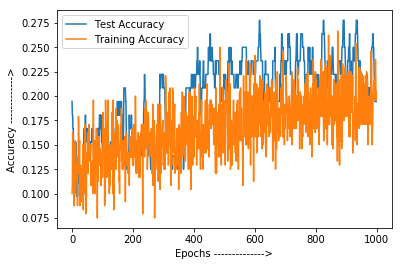

In [107]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'], label="Test Accuracy")
plt.plot(history.history['acc'], label="Training Accuracy")
plt.ylabel('Accuracy ------------->')
plt.xlabel('Epochs -------------->')
plt.legend()

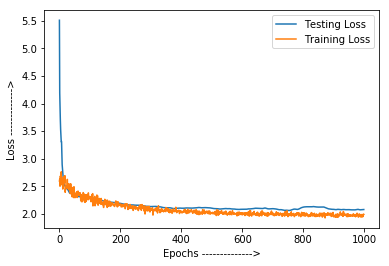

In [108]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label="Testing Loss")
plt.plot(history.history['loss'], label="Training Loss")
plt.ylabel('Loss ------------->')
plt.xlabel('Epochs -------------->')
plt.legend()

In [109]:
import datetime
now = datetime.datetime.now()
TempName = str(now.day) +str(now.month)+ str(now.hour) + str(now.minute)

# serialize model to JSON
#model_json = model.to_json()
#with open(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/" + TempName + "_100FV_CNN_8Class.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/" + TempName + "_100FV_CNN_8Class.h5")



model.save(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/ModandWeig_100FV_CNN_8Class_Tr28_Te23.h5")
print("Saved model to disk")




Saved model to disk
